In [1]:
# INPUT: experiment name
experiment_name = 'base'
study_name = 'homing_cmpt'
var_dict = {'cmpt_type': ['s', 'p', 'ss', 'pp', 'sp']}  # assumes full enumeration
# var_dict = {'cmpt_type': ['ss']}  # assumes full enumeration

In [2]:
import os
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
path = os.getcwd()
res_path = path

In [3]:
# Make folder for experiment if it doesn't exist
experiment_path = os.path.join(res_path, 'plots', experiment_name)
if not os.path.exists(os.path.join(res_path, 'plots')):
    os.mkdir(os.path.join(res_path, 'plots'))
if not os.path.exists(experiment_path):
    os.mkdir(experiment_path)

In [4]:
# Determine scenarios - enumerating based on input
keys, values_lists = zip(*var_dict.items())
scenarios = list(itertools.product(*values_lists))
scenario_names = ['-'.join(f"{key}-{value}" for key, value in zip(keys, scenario)) for scenario in scenarios]
scenario_names = [s.replace('cmpt_type-','') for s in scenario_names]  # drop 'cmpt_type' from scn name

In [5]:
def open_pickle(scn_dict, aggr_scn_path, pkl_name):
    with open(os.path.join(aggr_scn_path, pkl_name), 'rb') as f:
        df = pickle.load(f)
        # print(df)
        for key, value in scn_dict.items():
            df[key] = value
        index_list = [key for key in scn_dict] + ['day']
        df = df.reset_index().set_index(index_list)
    return df

In [6]:
# Loop over scenarios, creating list of df's containing the data, and converting to single df
aggr_dem_list = []
aggr_sup_list = []
# mode_no_rs_list = []
mode_df = pd.DataFrame()
for scn_name in scenario_names:
    # Determine scenario values and save them to dict
    scn_name_split = scn_name.split('-')
    scn_dict = {}
    for i in range(1, len(scn_name_split), 2):
        variable_name = scn_name_split[i]
        variable_value = scn_name_split[i + 1]
        scn_dict[variable_name] = variable_value
    scn_dict['cmpt_type'] = scn_name_split[0]
    # List all folders and find those corresponding to the specific scenario
    aggr_scn_path = os.path.join(res_path, 'aggr_repl', scn_name)
    all_items = os.listdir(aggr_scn_path)
    aggr_dem = open_pickle(scn_dict, aggr_scn_path, 'aggr_dem.pkl')
    aggr_sup = open_pickle(scn_dict, aggr_scn_path, 'aggr_sup.pkl')

    with open(os.path.join(aggr_scn_path, 'mode_no_rs.pkl'), 'rb') as f:
        mode_series = pickle.load(f)
        for key, value in scn_dict.items():
            mode_series[key] = value
        mode_df = mode_df.append(mode_series, ignore_index=True)
    aggr_dem_list = aggr_dem_list + [aggr_dem]
    aggr_sup_list = aggr_sup_list + [aggr_sup]
    # mode_no_rs_list = mode_no_rs_list + [df]
aggr_dem = pd.concat(aggr_dem_list)
aggr_sup = pd.concat(aggr_sup_list)
# mode_no_rs = pd.concat(mode_no_rs_list)

In [7]:
# Add scenario label
non_day_level = [level for level in aggr_dem.index.names if level != 'day'] # Find the scenario indices
if len(non_day_level) == 1:
    aggr_dem['label'] = aggr_dem.index.get_level_values(non_day_level[0])
    aggr_sup['label'] = aggr_sup.index.get_level_values(non_day_level[0])
else:
    aggr_dem['label'] = aggr_dem.index.to_frame(index=False)[non_day_level].astype(str).apply(lambda row: '_'.join(row))
    aggr_sup['label'] = aggr_sup.index.to_frame(index=False)[non_day_level].astype(str).apply(lambda row: '_'.join(row))
mode_df = mode_df.rename(columns={"cmpt_type":"label"}).set_index('label')

In [8]:
aggr_sup

pickup_dist   repos_dist      km_occ_1      km_occ_0  informed  \
cmpt_type day                                                                   
s         0    2885.562876  3142.069867  13228.643316   6027.632743     624.4   
          1    3029.996243  2582.812530  13374.904862   5612.808773     733.8   
          2    3303.262418  2020.605314  13866.564312   5323.867732     823.4   
          3    3704.775149  1815.944416  14787.140640   5520.719565     907.2   
          4    3911.740626  1991.372099  15791.581790   5903.112725     996.6   
...                    ...          ...           ...           ...       ...   
sp        254  9874.324919  7321.924910  50739.951855  17196.249830    2500.0   
          255  9718.093498  7449.040379  50673.354703  17167.133877    2500.0   
          256  9797.093680  7591.066602  50477.666352  17388.160282    2500.0   
          257  9642.298309  7789.233715  50320.440015  17431.532024    2500.0   
          258  9745.845497  7309.015648  50362.969044  17054.861144    2500.0   

               registered_0  ptcp_0     exp_inc  days_since_reg   work_exp  \
cmpt_type day                                                                
s         0           234.6   152.0   82.870877        5.820033   0.616243   
          1           226.6   140.4   91.524552        6.581314   1.207620   
          2           222.2   126.0  107.053223        7.078572   1.707192   
          3           227.2   123.2  117.350177        7.295159   2.128591   
          4           234.8   131.8  116.659166        7.504775   2.574692   
...                     ...     ...         ...             ...        ...   
sp        254         376.0   303.5  112.524654       28.968133  22.721852   
          255         380.0   303.5  111.012276       29.008341  22.773513   
          256         376.5   308.0  110.796965       28.972092  22.668318   
          257         374.0   304.0  110.197674       29.112572  22.674802   
          258         383.5   301.0  110.609313       28.974301  22.475180   

               ...  expected_income_1  ptcp_sh_largest  res_wage_ptcp_1  \
cmpt_type day  ...                                                        
s         0    ...                NaN              NaN              NaN   
          1    ...                NaN              NaN              NaN   
          2    ...                NaN              NaN              NaN   
          3    ...                NaN              NaN              NaN   
          4    ...                NaN              NaN              NaN   
...            ...                ...              ...              ...   
sp        254  ...         109.362861            303.5        68.578057   
          255  ...         109.428464            303.5        68.240637   
          256  ...         109.566697            308.0        68.456649   
          257  ...         109.536588            304.0        68.581601   
          258  ...         109.368956            301.0        68.777963   

               exp_inc_sh_largest  exp_inc_sh_smallest  perc_inc_sh_largest  \
cmpt_type day                                                                 
s         0                   NaN                  NaN                  NaN   
          1                   NaN                  NaN                  NaN   
          2                   NaN                  NaN                  NaN   
          3                   NaN                  NaN                  NaN   
          4                   NaN                  NaN                  NaN   
...                           ...                  ...                  ...   
sp        254                 NaN                  NaN                  NaN   
          255                 NaN                  NaN                  NaN   
          256                 NaN                  NaN                  NaN   
          257                 NaN                  NaN                  NaN   
          258         

In [9]:
aggr_dem

informed  requests_0  gets_offer_0  accepts_offer_0  \
cmpt_type day                                                        
s         0      8419.4      2242.0        2239.2           2239.2   
          1     10452.2      2268.6        2263.8           2263.8   
          2     12382.0      2366.2        2360.6           2360.6   
          3     14291.6      2514.8        2511.6           2511.6   
          4     16063.6      2695.4        2691.8           2691.8   
...                 ...         ...           ...              ...   
sp        254   31027.5      6106.5        6105.5           6105.5   
          255   31027.5      6042.0        6040.0           6040.0   
          256   31027.5      6074.0        6073.5           6073.5   
          257   31027.5      6030.5        6028.5           6028.5   
          258   31027.5      6060.5        6059.5           6059.5   

               registered_0      car      pt     bike  time_occ_1  \
cmpt_type day                                                       
s         0          6518.2  10344.4  6437.2  11897.4  527.980711   
          1          7095.0  10376.6  6377.6  11898.2  527.755780   
          2          7878.2  10335.0  6322.2  11897.6  525.549828   
          3          8864.6  10268.2  6321.4  11816.6  525.952837   
          4          9930.2  10164.4  6250.4  11810.8  525.837795   
...                     ...      ...     ...      ...         ...   
sp        254       14691.5   6918.0  4516.0   9217.5  462.728271   
          255       14692.5   6840.5  4560.0   9345.5  466.001983   
          256       14678.5   6867.5  4511.0   9337.0  463.697946   
          257       14713.0   6908.0  4500.0   9343.0  464.311201   
          258       14704.5   6924.0  4533.5   9313.0  464.487910   

               days_since_reg  ...  requests_sh_largest  \
cmpt_type day                  ...                        
s         0          5.682449  ...                  NaN   
          1          6.139280  ...                  NaN   
          2          6.429534  ...                  NaN   
          3          6.602913  ...                  NaN   
          4          6.786964  ...                  NaN   
...                       ...  ...                  ...   
sp        254      134.022275  ...               6106.5   
          255      134.499613  ...               6042.0   
          256      134.993949  ...               6074.0   
          257      135.434924  ...               6030.5   
          258      135.875138  ...               6060.5   

               gets_offer_mh_largest  accepts_offer_mh_largest  \
cmpt_type day                                                    
s         0                      NaN                       NaN   
          1                      NaN                       NaN   
          2                      NaN                       NaN   
          3                      NaN                       NaN   
          4                      NaN                       NaN   
...                              ...                       ...   
sp        254                    NaN                       NaN   
          255                    NaN                       NaN   
          256                    NaN                       NaN   
          257                    NaN                       NaN   
          258                    NaN                       NaN   

               exp_wait_sh_largest  exp_wait_sh_smallest  \
cmpt_type day                                              
s         0                    NaN                   NaN   
          1                    NaN                   NaN   
          2                    NaN                   NaN   
          3                    NaN                   NaN   
          4                    NaN                   NaN   
...                            ...                   ...   
sp        254                  NaN                   NaN   
          255                  NaN     

In [10]:
# aggr_dem_reset = aggr_dem.reset_index()

# # Get unique values in the 'label' column
# unique_labels = aggr_dem_reset['label'].unique()

# # Get the list of columns (excluding index-related and 'label')
# data_columns = aggr_dem_reset.columns.difference(['index1', 'index2', 'day', 'label'])

# # Calculate the number of subplots based on the number of columns
# num_subplots = len(data_columns)

# # Create subplots within a single figure
# fig, axs = plt.subplots(nrows=num_subplots, figsize=(10, 6*num_subplots))

# # Iterate over columns and create subplots
# for idx, col in enumerate(data_columns):
#     ax = axs[idx]
    
#     # Iterate over unique labels and plot the data for each label
#     for label in unique_labels:
#         label_data = aggr_dem_reset[aggr_dem_reset['label'] == label]
#         ax.plot(label_data['day'], label_data[col], label=label)
    
#     ax.set_xlabel('Day')
#     ax.set_ylabel(col)
#     ax.set_title(f'Column: {col}')
#     ax.legend()

# plt.tight_layout()
# plt.savefig('Demand-indicators.png', facecolor='w')
# # plt.show()

In [11]:
# aggr_sup_reset = aggr_sup.reset_index()

# # Get unique values in the 'label' column
# unique_labels = aggr_sup_reset['label'].unique()

# # Get the list of columns (excluding index-related and 'label')
# data_columns = aggr_sup_reset.columns.difference(['index1', 'index2', 'day', 'label'])

# # Calculate the number of subplots based on the number of columns
# num_subplots = len(data_columns)

# # Create subplots within a single figure
# fig, axs = plt.subplots(nrows=num_subplots, figsize=(10, 6*num_subplots))

# # Iterate over columns and create subplots
# for idx, col in enumerate(data_columns):
#     ax = axs[idx]
    
#     # Iterate over unique labels and plot the data for each label
#     for label in unique_labels:
#         label_data = aggr_sup_reset[aggr_sup_reset['label'] == label]
#         ax.plot(label_data['day'], label_data[col], label=label)
    
#     ax.set_xlabel('Day')
#     ax.set_ylabel(col)
#     ax.set_title(f'Column: {col}')
#     ax.legend()

# plt.tight_layout()
# plt.savefig('Supply-indicators.png', facecolor='w')
# # plt.show()

In [12]:
# Create df with market (system) level indicators
aggr_dem_reset = aggr_dem.reset_index()
aggr_sup_reset = aggr_sup.reset_index()
market_df = aggr_dem_reset.copy()[['day','label']]
market_df['tot_regist_dem'] = aggr_dem_reset.registered_mh + aggr_dem_reset.registered_sh_0 + aggr_dem_reset.registered_sh_1.fillna(0)
market_df['market_share'] = (aggr_dem_reset.accepts_offer_0 + aggr_dem_reset.accepts_offer_1.fillna(0)) / 100000
# market_df['exp_wait'] = aggr_dem_reset.corr_xp_wait
# market_df['exp_ivt'] = aggr_dem_reset.xp_ivt
market_df['tot_regist_sup'] = aggr_sup_reset.registered_mh + aggr_sup_reset.registered_sh_0 + aggr_sup_reset.registered_sh_1.fillna(0)
market_df['tot_ptcp'] = aggr_sup_reset.ptcp_mh + aggr_sup_reset.ptcp_sh_0 + aggr_sup_reset.ptcp_sh_1.fillna(0)
market_df['exp_inc'] = aggr_sup_reset.exp_inc
# market_df['perc_inc_reg_mh'] = aggr_sup_reset.perc_inc_reg_mh
# market_df['perc_inc_notreg_mh'] = aggr_sup_reset.perc_inc_notreg_mh
market_df['rel_pickup_dist'] = aggr_sup_reset.pickup_dist / market_df.market_share / 100000
market_df['rel_repos_dist'] = aggr_sup_reset.repos_dist / market_df.market_share / 100000

# Define a helper function to handle the existence check and NaN filling
def get_column_sum(df, column_name):
    if column_name in df:
        return df[column_name].fillna(0)
    else:
        return 0
    
market_df['rel_serving_dist'] = (get_column_sum(aggr_sup_reset, 'km_occ_1') +
    get_column_sum(aggr_sup_reset, 'km_occ_2') +
    get_column_sum(aggr_sup_reset, 'km_occ_3') +
    get_column_sum(aggr_sup_reset, 'km_occ_4')) / market_df.market_share / 100000
market_df['driver_per_req'] = market_df.tot_ptcp / market_df.market_share / 100000
market_df['service_rate'] = (aggr_dem_reset.accepts_offer_0 + aggr_dem_reset.accepts_offer_1.fillna(0)) / (aggr_dem_reset.requests_mh + aggr_dem_reset.requests_sh_0 + aggr_dem_reset.requests_sh_1.fillna(0))
market_df['service_rate_0'] = aggr_dem_reset.gets_offer_0 / aggr_dem_reset.requests_0
market_df['service_rate_1'] = aggr_dem_reset.gets_offer_1 / aggr_dem_reset.requests_1

In [13]:
# # Set indicators to be plotted (selected from market df)
# plot_indicators = market_df.columns.drop(['label', 'day'])

# # Calculate the number of subplots based on the number of columns
# num_subplots = len(plot_indicators)

# # Create subplots within a single figure
# fig, axs = plt.subplots(nrows=num_subplots, figsize=(10, 6*num_subplots))

# # Iterate over columns and create subplots
# for idx, col in enumerate(plot_indicators):
#     ax = axs[idx]
    
#     # Iterate over unique labels and plot the data for each label
#     for label in unique_labels:
#         label_data = market_df[market_df['label'] == label]
#         ax.plot(label_data['day'], label_data[col], label=label)
    
#     ax.set_xlabel('Day')
#     ax.set_ylabel(col)
#     ax.set_title(f'Column: {col}')
#     ax.legend()

# plt.tight_layout()
# plt.savefig('Select-indicators.png', facecolor='w')
# # plt.show()

In [14]:
conv_steady_days = 25
moving_average_days = 125
eql_dem = aggr_dem.groupby(['label']).tail(conv_steady_days + moving_average_days).groupby(['label']).mean()
eql_sup = aggr_sup.groupby(['label']).tail(conv_steady_days + moving_average_days).groupby(['label']).mean()

In [15]:
# # Set indicators to be plotted (selected from market df)
# plot_indicators = eql_dem.columns

# # Calculate the number of subplots based on the number of columns
# num_subplots = len(plot_indicators)

# # Create subplots within a single figure
# fig, axs = plt.subplots(nrows=num_subplots, figsize=(10, 6*num_subplots))

# # Iterate over columns and create subplots
# for idx, col in enumerate(plot_indicators):
#     ax = axs[idx]
    
#     # # Iterate over unique labels and plot the data for each label
#     # for label in unique_labels:
#     #     label_data = eql_dem[eql_dem.index == label]
#     ax.bar(height=eql_dem[col], x=eql_dem.index.values)
    
#     ax.set_xlabel('Day')
#     ax.set_ylabel(col)
#     ax.set_title(f'Column: {col}')
#     ax.legend()

# plt.tight_layout()
# plt.savefig('Eql-select-indicators.png', facecolor='w')

In [16]:
# # plot data in stack manner of bar type
# eql_dem['rs'] = eql_dem.accepts_offer_0 + eql_dem.accepts_offer_1.fillna(0)

# # Create the stacked bar chart
# ax = (eql_dem[['rs','bike','car','pt']] / 100000 * 100).reset_index().plot(x='label', kind='bar', stacked=True,
#         title='Modal share under different ridesourcing service types')

# # # Label bars with their values
# # for container in ax.containers:
# #     ax.bar_label(container, label_type='center', fontsize=10, padding=3, labels=[f'{h:.2f}' for h in container.get_heights()])

# # Label bars with their values
# for container in ax.containers:
#     ax.bar_label(container, label_type='center', fontsize=10, padding=3, fmt='%.1f%%')
# # Show the plot
# plt.ylabel('Modal share (%)')
# plt.legend(bbox_to_anchor=(1, 0.5))
# plt.show()

In [17]:
eql_dem['former_bike'] = mode_df.no_rs_bike - eql_dem.bike
eql_dem['former_car'] = mode_df.no_rs_car - eql_dem.car
eql_dem['former_pt'] = mode_df.no_rs_pt - eql_dem.pt


In [18]:
eql_dem

,informed,requests_0,gets_offer_0,accepts_offer_0,registered_0,car,pt,bike,time_occ_1,days_since_reg,...,accepts_offer_mh_largest,exp_wait_sh_largest,exp_wait_sh_smallest,exp_corr_wait_sh_largest,exp_corr_wait_sh_smallest,perc_wait_sh_largest,perc_wait_sh_smallest,former_bike,former_car,former_pt
label,,,,,,,,,,,,,,,,,,,,,
p,30921.412222,9966.192667,9964.439778,9964.439778,30903.025333,7070.187333,4473.765333,9411.273556,331.572945,99.847758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3323.926444,4287.812667,2354.034667
pp,30924.000000,5052.693333,5050.700000,5050.700000,15514.080000,7004.180000,4424.813333,9445.060000,361.517994,23.630386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3290.140000,4353.820000,2402.986667
s,30913.993333,9295.306333,9293.824333,9293.824333,30906.716667,7161.601333,4905.692667,9551.399667,525.169031,105.697613,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3183.800333,4196.398667,1922.107333
sp,30925.923333,5986.072889,5985.061667,5985.061667,14518.942889,6867.140111,4517.652000,9266.134667,462.653265,100.688164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3469.065333,4490.859889,2310.148000
ss,30921.000000,3727.605333,3723.352000,3723.352000,12431.697333,7166.216000,4906.502667,9549.338667,525.284291,117.266223,...,0.0,93.957753,69.387164,94.223228,1211.703348,97.531382,1377.006513,3185.861333,4191.784000,1921.297333


In [19]:
# Order the dataframes based on cmpt type
desired_order = ['ss','sp','pp','s','p']
eql_dem.index = pd.Categorical(eql_dem.index, categories=desired_order, ordered=True)
eql_sup.index = pd.Categorical(eql_sup.index, categories=desired_order, ordered=True)
eql_dem = eql_dem.reindex(desired_order)
eql_sup = eql_sup.reindex(desired_order)
# Now, the DataFrame has the same index name ('label') and is ordered based on the desired order
eql_dem.index.name = 'label'
eql_sup.index.name = 'label'
# eql_sup['label_ordered'] = pd.Categorical(eql_sup.index, categories=desired_order, ordered=True)
# eql_dem['label_ordered'] = pd.Categorical(eql_dem.index, categories=desired_order, ordered=True)

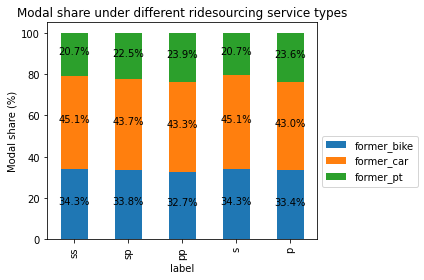

In [20]:
# Create the stacked bar chart
ax = (eql_dem[['former_bike','former_car','former_pt']]).div((eql_dem['requests_0'] + eql_dem['requests_1'].fillna(0)) / 100, axis=0).reset_index().plot(x='label', kind='bar', stacked=True,
        title='Modal share under different ridesourcing service types')

# # Label bars with their values
# for container in ax.containers:
#     ax.bar_label(container, label_type='center', fontsize=10, padding=3, labels=[f'{h:.2f}' for h in container.get_heights()])

# Label bars with their values
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10, padding=3, fmt='%.1f%%')
# Show the plot
plt.ylabel('Modal share (%)')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(os.path.join(experiment_path,'prev-modes.png'), facecolor='w')
plt.show()


# waarom 50 procent bij requests_sh_0, requests_sh_1 en requests_mh, gaat iets fout? heeft iets met singlehoming en multihoming te maken? bars zijn ook niet helemaal gelijk?
# dit plaatje met accepts_offer kan meer zijn dan 1 omdat er ook requests worden afggewezen?
# Note: requests is niet goed als er multi-homers zijn. Bars zijn ook niet allemaal gelijk?

In [21]:
eql_dem

,informed,requests_0,gets_offer_0,accepts_offer_0,registered_0,car,pt,bike,time_occ_1,days_since_reg,...,accepts_offer_mh_largest,exp_wait_sh_largest,exp_wait_sh_smallest,exp_corr_wait_sh_largest,exp_corr_wait_sh_smallest,perc_wait_sh_largest,perc_wait_sh_smallest,former_bike,former_car,former_pt
label,,,,,,,,,,,,,,,,,,,,,
ss,30921.000000,3727.605333,3723.352000,3723.352000,12431.697333,7166.216000,4906.502667,9549.338667,525.284291,117.266223,...,0.0,93.957753,69.387164,94.223228,1211.703348,97.531382,1377.006513,3185.861333,4191.784000,1921.297333
sp,30925.923333,5986.072889,5985.061667,5985.061667,14518.942889,6867.140111,4517.652000,9266.134667,462.653265,100.688164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3469.065333,4490.859889,2310.148000
pp,30924.000000,5052.693333,5050.700000,5050.700000,15514.080000,7004.180000,4424.813333,9445.060000,361.517994,23.630386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3290.140000,4353.820000,2402.986667
s,30913.993333,9295.306333,9293.824333,9293.824333,30906.716667,7161.601333,4905.692667,9551.399667,525.169031,105.697613,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3183.800333,4196.398667,1922.107333
p,30921.412222,9966.192667,9964.439778,9964.439778,30903.025333,7070.187333,4473.765333,9411.273556,331.572945,99.847758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3323.926444,4287.812667,2354.034667


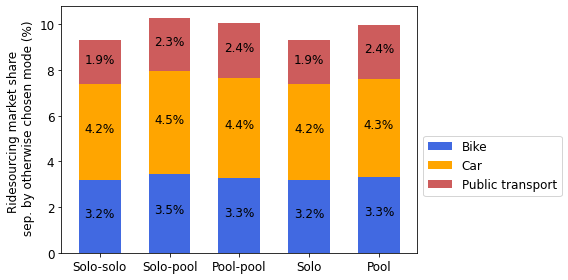

In [22]:
# Colors
# colors = ['#0076C2', '#EC6842', '#6CC24A']
colors = ['royalblue','orange','indianred']

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(8, 4))

(eql_dem[['former_bike','former_car','former_pt']] / 100000 * 100).reset_index().plot(ax=ax, x='label', kind='bar', stacked=True, width=0.6, color=colors)

# # Label bars with their values
# for container in ax.containers:
#     ax.bar_label(container, label_type='center', fontsize=10, padding=3, labels=[f'{h:.2f}' for h in container.get_heights()])

# Label bars with their values
# for container in ax.containers:
#     ax.bar_label(container, label_type='center', fontsize=10, padding=3, fmt='%.2f')
# Show the plot

# Adjust the size of y-tick labels
ax.tick_params(axis='y', labelsize=12)  # Adjust the labelsize as needed

# Customize the labels of the bars
handles, labels = ax.get_legend_handles_labels()
ax.set_xticklabels(['Solo-solo', 'Solo-pool', 'Pool-pool', 'Solo', 'Pool'], rotation=0, size=12)
ax.set_xlabel('')

for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=12, padding=3, fmt='%.1f%%')

plt.ylabel('Ridesourcing market share \n sep. by otherwise chosen mode (%)', size=12)
plt.legend(bbox_to_anchor=(1, 0.5),handles=handles, labels=['Bike', 'Car','Public transport'],fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(experiment_path,'prev-modes.png'), facecolor='w')
plt.show()

In [23]:
mode_df

,no_rs_bike,no_rs_car,no_rs_pt,other_trav_bike,other_trav_car,other_trav_pt
label,,,,,,
s,12735.2,11358.0,6827.8,55768.4,9365.8,3944.8
p,12735.2,11358.0,6827.8,55768.4,9365.8,3944.8
ss,12735.2,11358.0,6827.8,55768.4,9365.8,3944.8
pp,12735.2,11358.0,6827.8,55768.4,9365.8,3944.8
sp,12735.2,11358.0,6827.8,55768.4,9365.8,3944.8


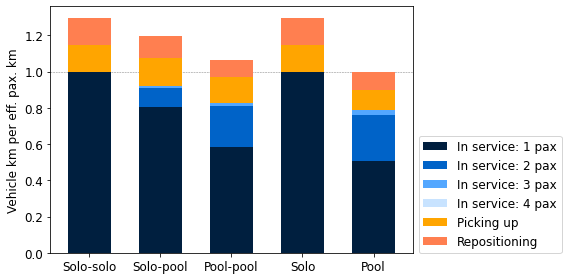

0    1.294389
1    1.195082
2    1.064268
3    1.294066
4    0.998350
dtype: float64

In [36]:
colors = ['#001F3F', '#0063c8', '#53a7ff', '#c8e3ff', 'orange', 'coral']  #['#001F3F', '#004080', '#0070B3', '#0090E0', 'orange', 'coral']

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(8, 4))

(eql_sup[['km_occ_1','km_occ_2','km_occ_3','km_occ_4','pickup_dist','repos_dist']]).div((eql_dem['eff_pax_dist_0'] + eql_dem['eff_pax_dist_1'].fillna(0)) / 1000, axis=0).reset_index().plot(ax=ax, x='label', kind='bar', stacked=True,
         width=0.6, color=colors)

# # Label bars with their values
# for container in ax.containers:
#     ax.bar_label(container, label_type='center', fontsize=10, padding=3, labels=[f'{h:.2f}' for h in container.get_heights()])

# Label bars with their values
# for container in ax.containers:
#     ax.bar_label(container, label_type='center', fontsize=10, padding=3, fmt='%.2f')
# Show the plot

# horizontal line
ax.axhline(y = 1, color = 'grey', linestyle = '--', zorder=-99,linewidth=0.5) 

# Adjust the size of y-tick labels
ax.tick_params(axis='y', labelsize=12)  # Adjust the labelsize as needed

# Customize the labels of the bars
handles, labels = ax.get_legend_handles_labels()
ax.set_xticklabels(['Solo-solo', 'Solo-pool', 'Pool-pool', 'Solo', 'Pool'], rotation=0, size=12)
ax.set_xlabel('')

plt.ylabel('Vehicle km per eff. pax. km', size = 12)
plt.legend(bbox_to_anchor=(1, 0.5),handles=handles, labels=['In service: 1 pax', 'In service: 2 pax','In service: 3 pax', 'In service: 4 pax','Picking up','Repositioning'],fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(experiment_path,'veh-km.png'), facecolor='w')
plt.show()

(eql_sup[['km_occ_1','km_occ_2','km_occ_3','km_occ_4','pickup_dist','repos_dist']]).div((eql_dem['eff_pax_dist_0'] + eql_dem['eff_pax_dist_1'].fillna(0)) / 1000, axis=0).reset_index().sum(axis=1)


In [25]:
eql_sup

,pickup_dist,repos_dist,km_occ_1,km_occ_0,informed,registered_0,ptcp_0,exp_inc,days_since_reg,work_exp,...,out_1,expected_income_1,ptcp_sh_largest,res_wage_ptcp_1,exp_inc_sh_largest,exp_inc_sh_smallest,perc_inc_sh_largest,perc_inc_sh_smallest,perc_inc_reg_1,res_wage_reg_1
label,,,,,,,,,,,,,,,,,,,,,
ss,7943.643370,8096.342205,54485.606455,16039.985575,2500.000000,234.429333,189.562667,113.843753,102.005263,81.994302,...,0.885764,90.609399,474.389333,47.082526,113.911556,10.22574,113.694298,59.61088,74.786655,50.957522
sp,9799.423747,7537.629828,50164.788828,17337.053575,2500.000000,376.357889,298.519778,110.888216,25.602567,19.897846,...,0.930794,109.204713,298.519778,69.196963,NaN,NaN,NaN,NaN,110.500739,71.580773
pp,8634.603729,5922.548749,35500.379732,14557.152479,2500.000000,254.853333,200.086667,102.620798,34.974898,30.610144,...,0.920867,102.261482,NaN,64.327709,NaN,NaN,NaN,NaN,103.108654,66.810714
s,7911.229428,8108.239595,54475.685185,16019.469024,2499.853333,592.642000,475.392333,113.783101,86.765185,71.091329,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p,6691.826600,6123.434845,30807.358068,12815.261445,2498.552000,503.864444,388.448000,107.082152,78.292364,61.774248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


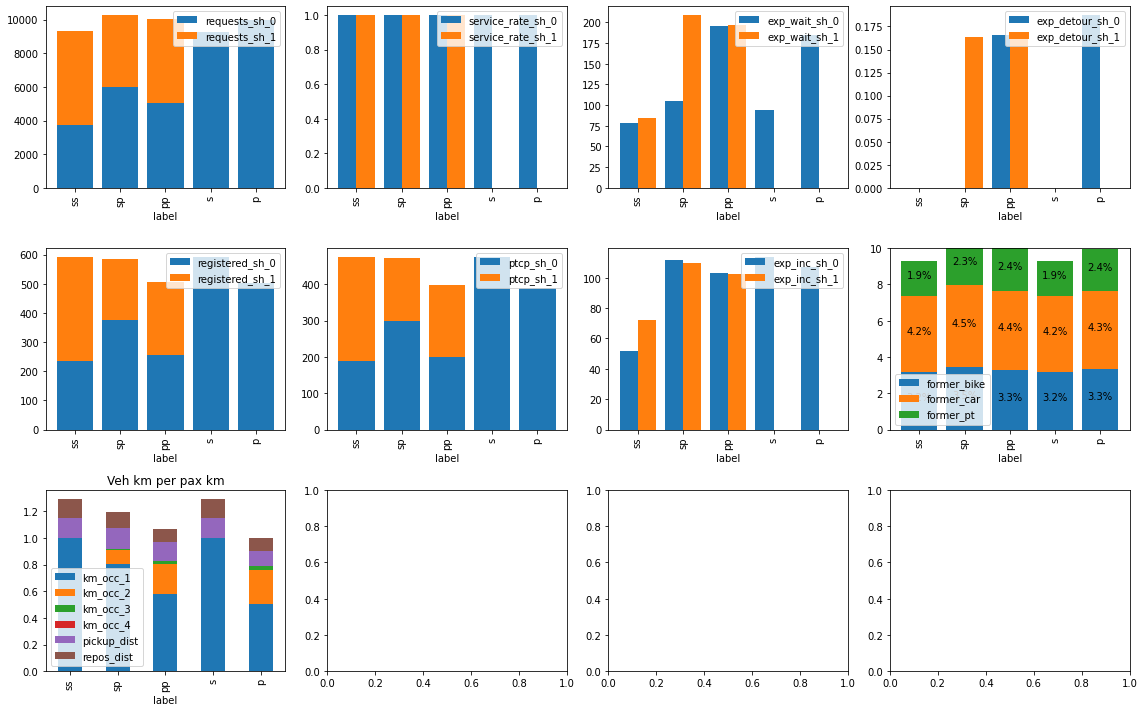

In [26]:
# Create subplots within a single figure
n_rows = 3
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 10))

eql_dem['service_rate_sh_0'] = eql_dem['gets_offer_sh_0'] / eql_dem['requests_sh_0']
eql_dem['service_rate_sh_1'] = eql_dem['gets_offer_sh_1'] / eql_dem['requests_sh_1']

indicators = ['requests_sh','service_rate_sh', 'exp_wait_sh', 'exp_detour_sh', 'registered_sh', 'ptcp_sh', 'exp_inc_sh']
stacked = [True, False, False, False, True, True, False]
type = ['dem', 'dem', 'dem', 'dem', 'sup', 'sup', 'sup']

i = 0
for j, indicator in enumerate(indicators):
    
    k = j - i*n_cols
        # ax.bar(height=eql_dem[indicators[j]], x=eql_dem.index.values)
    
    if type[j] == 'dem':
        if stacked[j]:
            eql_dem[['{}_0'.format(indicators[j]),'{}_1'.format(indicators[j])]].plot(kind='bar', stacked=True, ax = axes[i, k], width=0.8)
        else:
            eql_dem[['{}_0'.format(indicators[j]),'{}_1'.format(indicators[j])]].plot(kind='bar', stacked=False, ax = axes[i, k], width = 0.8)
    else:
        if stacked[j]:
            eql_sup[['{}_0'.format(indicators[j]),'{}_1'.format(indicators[j])]].plot(kind='bar', stacked=True, ax = axes[i, k], width=0.8)
        else:
            eql_sup[['{}_0'.format(indicators[j]),'{}_1'.format(indicators[j])]].plot(kind='bar', stacked=False, ax = axes[i, k], width = 0.8)
    
    ax.set_xlabel('Day')
    ax.set_ylabel(indicators[j])
    ax.set_title(f'Column: {indicators[j]}')
    ax.legend()

    if j == n_cols-1:
        i+=1


# axes[0,0].set_ylim(0,35000)
# axes[0,1].set_ylim(0,10000)

(eql_dem[['former_bike','former_car','former_pt']] / 100000 * 100).plot(kind='bar', stacked=True, ax=axes[1,3], width=0.8)
# Label bars with their values
for container in axes[1,3].containers:
    axes[1, 3].bar_label(container, label_type='center', fontsize=10, padding=3, fmt='%.1f%%')
axes[1,3].set_ylim(0,10)

(eql_sup[['km_occ_1','km_occ_2','km_occ_3','km_occ_4','pickup_dist','repos_dist']]).div((eql_dem['eff_pax_dist_0'] + eql_dem['eff_pax_dist_1'].fillna(0)) / 1000, axis=0).reset_index().plot(x='label', kind='bar', stacked=True,
        title='Veh km per pax km', ax = axes[2,0])

plt.tight_layout()
plt.savefig('Eql-dem-indicators.png', facecolor='w')

In [27]:
eql_soc

NameError: name 'eql_soc' is not defined

In [ ]:
aggr_dem.keys()

Index(['informed', 'registered_0', 'requests_0', 'gets_offer_0',
       'accepts_offer_0', 'bike', 'car', 'pt', 'time_occ_1',
       'init_perc_wait_0', 'xp_wait_0', 'corr_xp_wait_0', 'init_perc_ivt_0',
       'xp_ivt_0', 'init_perc_km_fare_0', 'xp_km_fare_0', 'informed_mh',
       'informed_sh', 'registered_mh', 'registered_sh_0', 'registered_sh_1',
       'requests_mh', 'requests_sh_0', 'requests_sh_1', 'gets_offer_mh_0',
       'gets_offer_mh_1', 'gets_offer_sh_0', 'gets_offer_sh_1',
       'accepts_offer_mh_0', 'accepts_offer_mh_1', 'exp_wait_mh',
       'exp_wait_sh_0', 'exp_wait_sh_1', 'exp_corr_wait_mh',
       'exp_corr_wait_sh_0', 'exp_corr_wait_sh_1', 'exp_detour_mh',
       'exp_detour_sh_0', 'exp_detour_sh_1', 'exp_km_fare_mh',
       'exp_km_fare_sh_0', 'exp_km_fare_sh_1', 'perc_wait_mh',
       'perc_wait_sh_0', 'perc_wait_sh_1', 'perc_detour_mh',
       'perc_detour_sh_0', 'perc_detour_sh_1', 'perc_km_fare_mh',
       'perc_km_fare_sh_0', 'perc_km_fare_sh_1', 'eff_pax_di